In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

In [3]:
NSIDE = 128
m= hp.pixelfunc.ma(np.ones(hp.nside2npix(NSIDE)))
mask_theta = np.zeros(hp.nside2npix(NSIDE), dtype=np.bool)
pixel_theta, pixel_phi = hp.pix2ang(NSIDE, np.arange(hp.nside2npix(NSIDE)))

mask_pixels = np.where((pixel_theta > np.radians(80)) & (pixel_theta < np.radians(100))) #(pixel_theta > np.pi/2.)

mask_pixels2 = np.where((pixel_phi > np.radians(90)) & (pixel_phi < np.radians(180)))  



In [4]:

mask_theta[mask_pixels] = 1.
mask_2 = np.zeros(hp.nside2npix(NSIDE), dtype=np.bool)
mask_2[mask_pixels2] = 1.


In [5]:
m.mask = mask_theta + mask_2

In [6]:
hpxmap = np.random.poisson(1., size=hp.nside2npix(NSIDE))

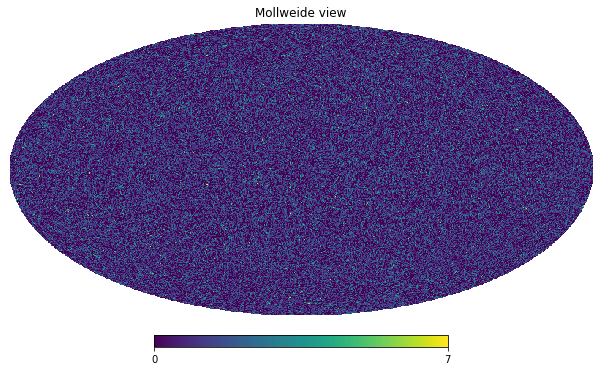

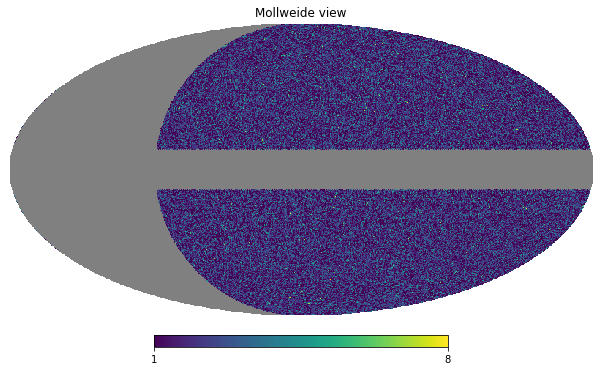

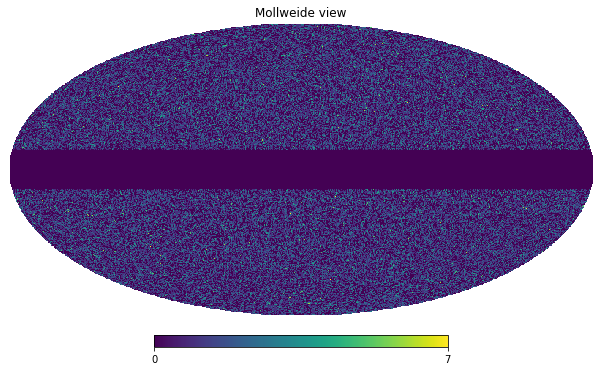

In [7]:
hp.mollview(hpxmap)
hp.mollview(hpxmap+m)
hpxmap2 = np.zeros_like(hpxmap)
hpxmap2[:] = hpxmap[:]
hpxmap2[mask_pixels] = 0.
hp.mollview(hpxmap2)

1 -- 0
196599 323993.0 161689
[1.0 1.0 1.0 ... 1.0 1.0 1.0]


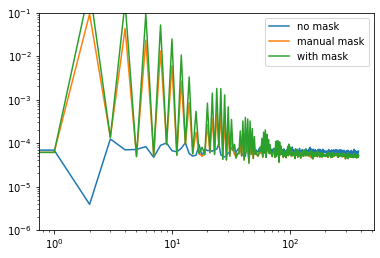

In [84]:
Cl = hp.sphtfunc.anafast(hpxmap) 
Cl_mask = hp.sphtfunc.anafast(hpxmap + m)
Cl_2 = hp.sphtfunc.anafast(hpxmap2) 
ell = np.arange(3 * NSIDE)

plt.plot(ell, Cl, label='no mask')

plt.plot(ell, Cl_2, label='manual mask')

plt.plot(ell, Cl_mask, label='with mask')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylim(1e-6, 1e-1)


idx = hp.ang2pix(NSIDE,np.pi/2,0)
print (hpxmap[idx], (hpxmap+m)[idx], hpxmap2[idx])
print (np.sum(hpxmap), np.sum(hpxmap+m), np.sum(hpxmap2))
